In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [10]:
Train_data = pd.read_csv('Train_Orig_Int.csv')
Validation_data = pd.read_csv('Valid_Orig_Int.csv')
Test_data = pd.read_csv('Test_Orig_Int.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         12000 non-null  int64  
 1   AnnualIncome                12000 non-null  int64  
 2   CreditScore                 12000 non-null  int64  
 3   EmploymentStatus            12000 non-null  int64  
 4   EducationLevel              12000 non-null  int64  
 5   Experience                  12000 non-null  int64  
 6   LoanAmount                  12000 non-null  int64  
 7   LoanDuration                12000 non-null  int64  
 8   MaritalStatus               12000 non-null  int64  
 9   NumberOfDependents          12000 non-null  int64  
 10  HomeOwnershipStatus         12000 non-null  int64  
 11  MonthlyDebtPayments         12000 non-null  int64  
 12  CreditCardUtilizationRate   12000 non-null  float64
 13  NumberOfOpenCreditLines     120

In [11]:
Train_data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,57,47030,511,0,0,35,15823,24,1,2,...,2196.833333,0.714049,2,34306,0.235323,0.260626,852.957015,0.572168,0,51.0
1,31,44704,587,0,3,6,42377,84,1,4,...,3725.333333,0.720363,6,95930,0.273877,0.328652,1294.384120,0.429863,0,50.0
2,40,86684,609,0,3,18,17768,36,0,4,...,7223.666667,0.722829,2,36259,0.198268,0.215082,674.055334,0.164329,0,53.0
3,59,207724,666,0,2,36,19782,60,1,0,...,17310.333333,0.906780,3,72339,0.191782,0.184749,507.457337,0.052596,1,33.6
4,32,54324,574,0,4,12,37298,48,0,1,...,4527.000000,0.703866,4,9862,0.245298,0.244149,1224.554472,0.390005,0,53.0


In [13]:
y_training = Train_data['LoanApproved']
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)


In [14]:
y_training.min()

0

In [15]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [16]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [17]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [18]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [19]:
print(y_training)

[0 0 0 ... 1 0 0]


In [20]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.636049
1  0.633986
2  0.631285
3  0.628811
4  0.626925
Validation Data
Confusion Matrix for hidden layer 8
[[2880  164]
 [ 383  573]]
Accuracy: 0.8632, Precision: 0.7775, Recall: 0.5994, F1-score: 0.6769

Test Data
Confusion Matrix for hiden layer 8
[[2866  178]
 [ 398  558]]
Accuracy: 0.8560, Precision: 0.7582, Recall: 0.5837, F1-score: 0.6596



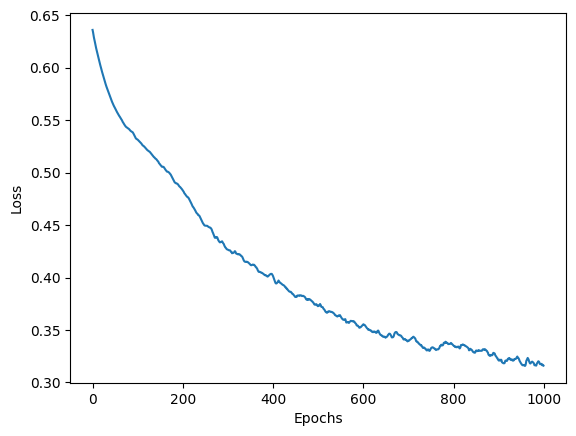

Training Losses are 
          0
0  0.718291
1  0.711935
2  0.705620
3  0.700134
4  0.695089
Validation Data
Confusion Matrix for hidden layer 16
[[2776  268]
 [ 293  663]]
Accuracy: 0.8598, Precision: 0.7121, Recall: 0.6935, F1-score: 0.7027

Test Data
Confusion Matrix for hiden layer 16
[[2781  263]
 [ 292  664]]
Accuracy: 0.8612, Precision: 0.7163, Recall: 0.6946, F1-score: 0.7053



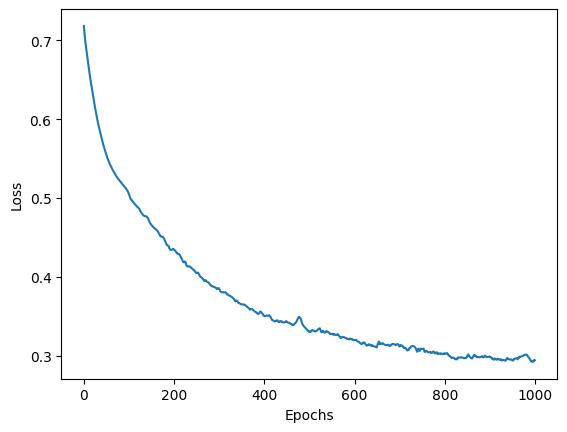

Training Losses are 
          0
0  0.716489
1  0.706691
2  0.697370
3  0.687841
4  0.679019
Validation Data
Confusion Matrix for hidden layer 32
[[2767  277]
 [ 257  699]]
Accuracy: 0.8665, Precision: 0.7162, Recall: 0.7312, F1-score: 0.7236

Test Data
Confusion Matrix for hiden layer 32
[[2768  276]
 [ 234  722]]
Accuracy: 0.8725, Precision: 0.7234, Recall: 0.7552, F1-score: 0.7390



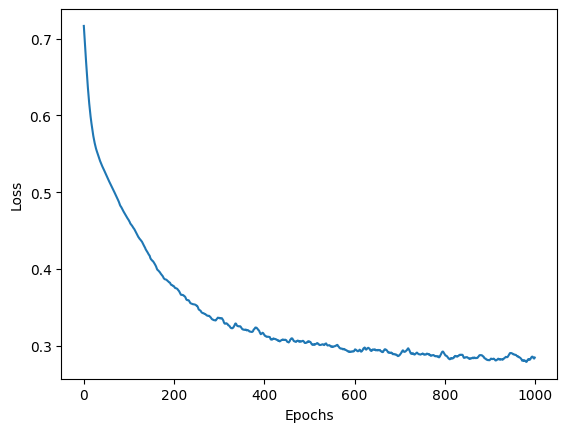

Training Losses are 
          0
0  0.784186
1  0.765235
2  0.747320
3  0.730129
4  0.713674
Validation Data
Confusion Matrix for hidden layer 64
[[2830  214]
 [ 317  639]]
Accuracy: 0.8672, Precision: 0.7491, Recall: 0.6684, F1-score: 0.7065

Test Data
Confusion Matrix for hiden layer 64
[[2831  213]
 [ 322  634]]
Accuracy: 0.8662, Precision: 0.7485, Recall: 0.6632, F1-score: 0.7033



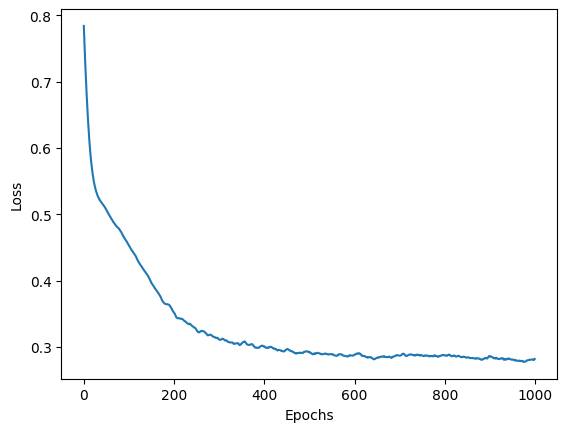

Training Losses are 
          0
0  0.834810
1  0.796324
2  0.760587
3  0.727506
4  0.697269
Validation Data
Confusion Matrix for hidden layer 128
[[2868  176]
 [ 361  595]]
Accuracy: 0.8658, Precision: 0.7717, Recall: 0.6224, F1-score: 0.6891

Test Data
Confusion Matrix for hiden layer 128
[[2863  181]
 [ 353  603]]
Accuracy: 0.8665, Precision: 0.7691, Recall: 0.6308, F1-score: 0.6931



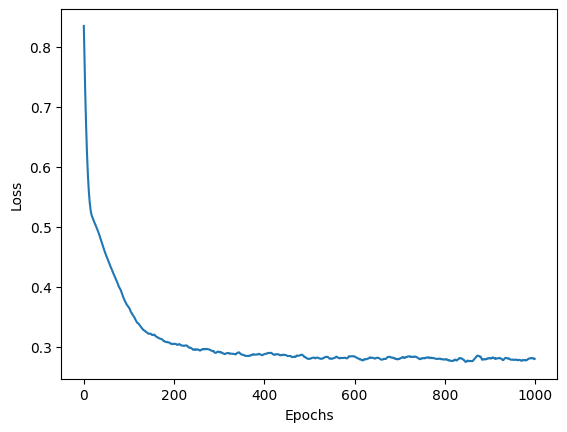

Best accuracy for test data is 0.856 for degree 8


In [21]:
nuerons = [8,16,32,64,128]
min_loss = 1000
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(33,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc < min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [22]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.629617
1  0.627910
2  0.626207
3  0.624387
4  0.622649
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[2833  211]
 [ 330  626]]
Accuracy: 0.8648, Precision: 0.7479, Recall: 0.6548, F1-score: 0.6983

Test Data
Confusion Matrix for hiden layer 8 and 8
[[2840  204]
 [ 315  641]]
Accuracy: 0.8702, Precision: 0.7586, Recall: 0.6705, F1-score: 0.7118



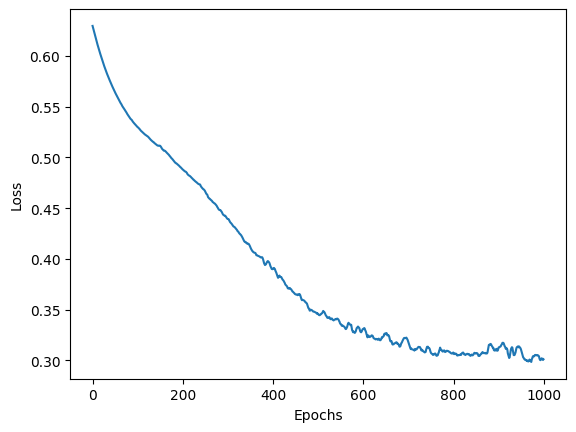

Training Losses are 
          0
0  0.653714
1  0.650774
2  0.647329
3  0.643904
4  0.640628
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2757  287]
 [ 278  678]]
Accuracy: 0.8588, Precision: 0.7026, Recall: 0.7092, F1-score: 0.7059

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2735  309]
 [ 260  696]]
Accuracy: 0.8578, Precision: 0.6925, Recall: 0.7280, F1-score: 0.7098



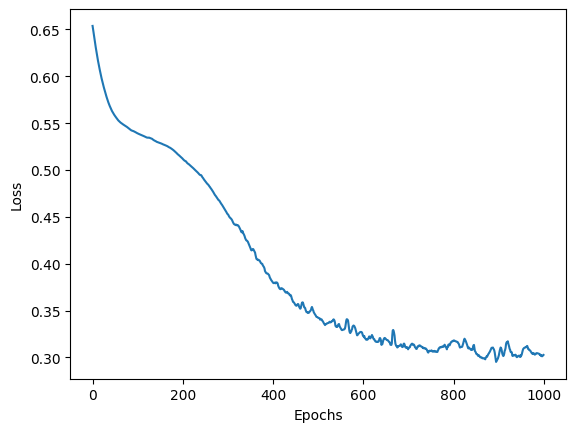

Training Losses are 
          0
0  0.719080
1  0.712767
2  0.706418
3  0.700205
4  0.694185
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2922  122]
 [ 430  526]]
Accuracy: 0.8620, Precision: 0.8117, Recall: 0.5502, F1-score: 0.6559

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2925  119]
 [ 440  516]]
Accuracy: 0.8602, Precision: 0.8126, Recall: 0.5397, F1-score: 0.6486



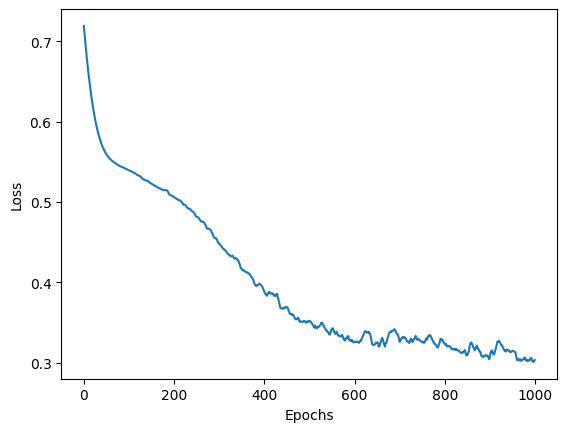

Training Losses are 
          0
0  0.693713
1  0.683475
2  0.673686
3  0.664317
4  0.655367
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2626  418]
 [ 165  791]]
Accuracy: 0.8542, Precision: 0.6543, Recall: 0.8274, F1-score: 0.7307

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2620  424]
 [ 161  795]]
Accuracy: 0.8538, Precision: 0.6522, Recall: 0.8316, F1-score: 0.7310



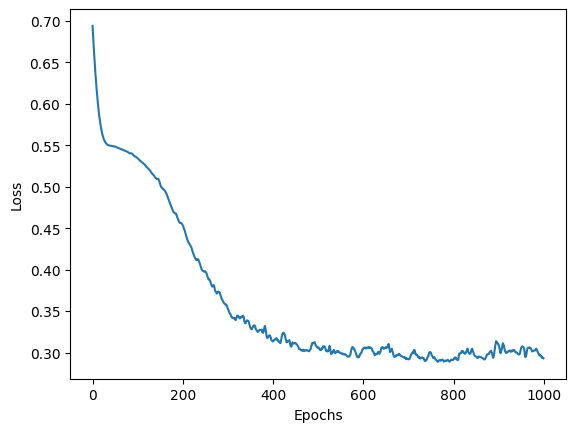

Training Losses are 
          0
0  0.695323
1  0.692160
2  0.689178
3  0.686296
4  0.683425
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[2762  282]
 [ 259  697]]
Accuracy: 0.8648, Precision: 0.7120, Recall: 0.7291, F1-score: 0.7204

Test Data
Confusion Matrix for hiden layer 16 and 8
[[2767  277]
 [ 229  727]]
Accuracy: 0.8735, Precision: 0.7241, Recall: 0.7605, F1-score: 0.7418



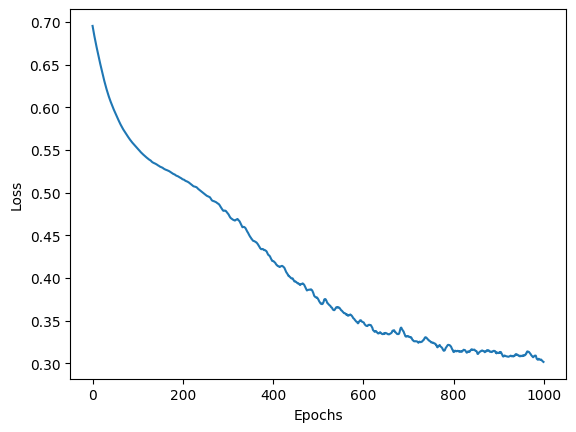

Training Losses are 
          0
0  0.811132
1  0.806096
2  0.801153
3  0.796273
4  0.791486
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2874  170]
 [ 321  635]]
Accuracy: 0.8772, Precision: 0.7888, Recall: 0.6642, F1-score: 0.7212

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2874  170]
 [ 353  603]]
Accuracy: 0.8692, Precision: 0.7801, Recall: 0.6308, F1-score: 0.6975



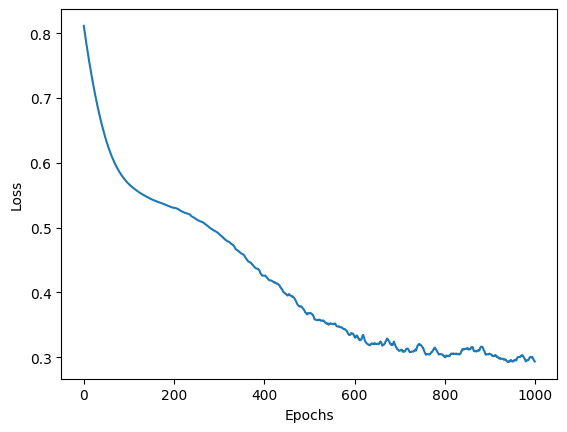

Training Losses are 
          0
0  0.901511
1  0.890719
2  0.880106
3  0.869651
4  0.859397
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2772  272]
 [ 272  684]]
Accuracy: 0.8640, Precision: 0.7155, Recall: 0.7155, F1-score: 0.7155

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2782  262]
 [ 270  686]]
Accuracy: 0.8670, Precision: 0.7236, Recall: 0.7176, F1-score: 0.7206



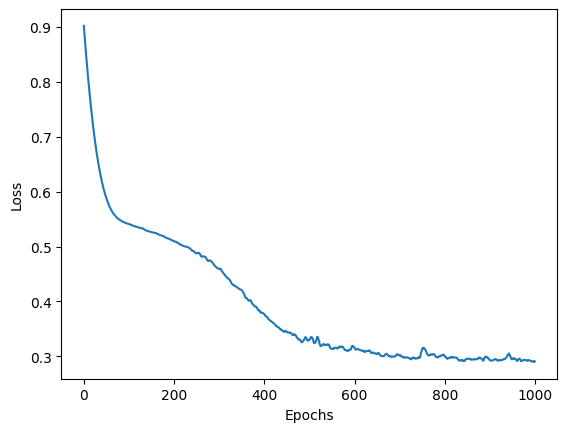

Training Losses are 
          0
0  0.834204
1  0.818458
2  0.803088
3  0.788278
4  0.773831
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2809  235]
 [ 289  667]]
Accuracy: 0.8690, Precision: 0.7395, Recall: 0.6977, F1-score: 0.7180

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2811  233]
 [ 311  645]]
Accuracy: 0.8640, Precision: 0.7346, Recall: 0.6747, F1-score: 0.7034



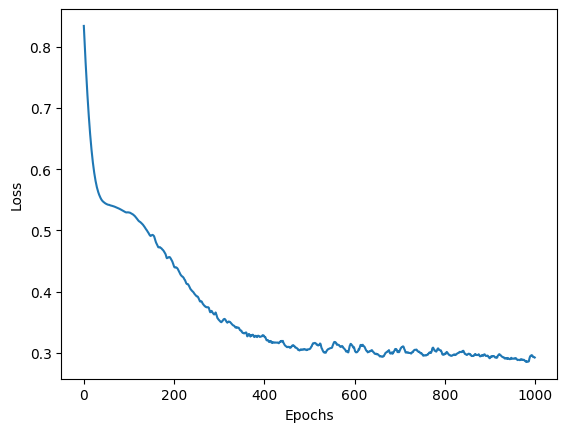

Training Losses are 
          0
0  0.643070
1  0.640582
2  0.638106
3  0.635685
4  0.633297
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2786  258]
 [ 296  660]]
Accuracy: 0.8615, Precision: 0.7190, Recall: 0.6904, F1-score: 0.7044

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2785  259]
 [ 282  674]]
Accuracy: 0.8648, Precision: 0.7224, Recall: 0.7050, F1-score: 0.7136



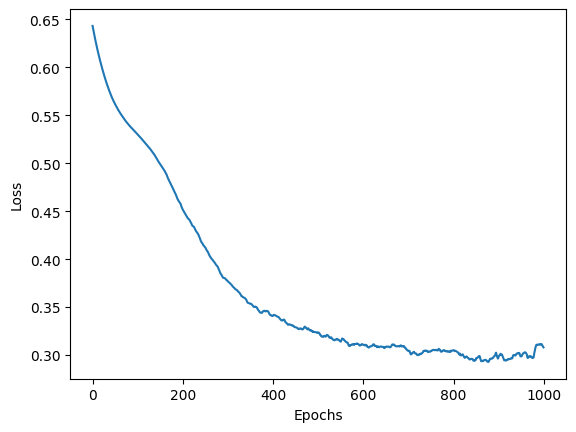

Training Losses are 
          0
0  0.710019
1  0.704522
2  0.699187
3  0.694004
4  0.688857
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2800  244]
 [ 294  662]]
Accuracy: 0.8655, Precision: 0.7307, Recall: 0.6925, F1-score: 0.7111

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2816  228]
 [ 303  653]]
Accuracy: 0.8672, Precision: 0.7412, Recall: 0.6831, F1-score: 0.7109



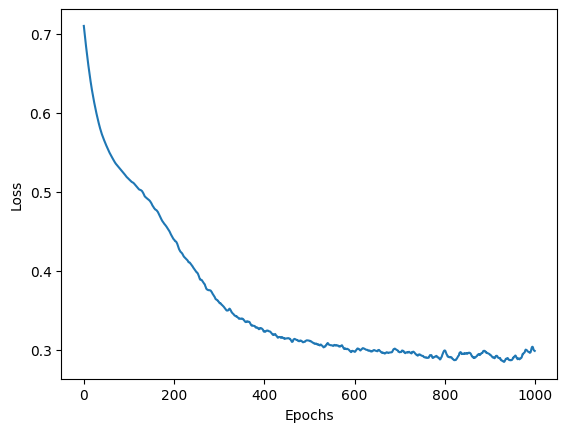

Training Losses are 
          0
0  0.728289
1  0.718953
2  0.709855
3  0.701115
4  0.692591
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2811  233]
 [ 309  647]]
Accuracy: 0.8645, Precision: 0.7352, Recall: 0.6768, F1-score: 0.7048

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2842  202]
 [ 329  627]]
Accuracy: 0.8672, Precision: 0.7563, Recall: 0.6559, F1-score: 0.7025



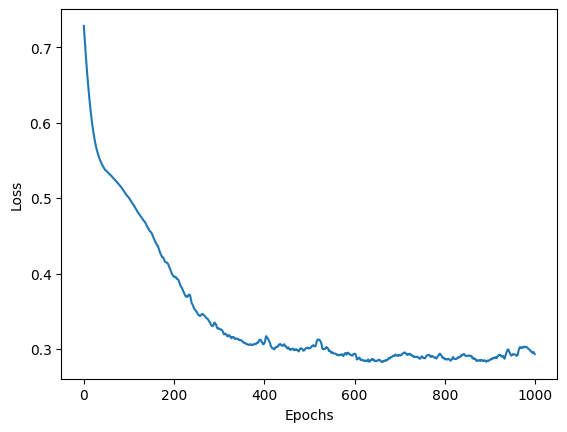

Training Losses are 
          0
0  0.720033
1  0.706006
2  0.692714
3  0.680110
4  0.668129
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2788  256]
 [ 298  658]]
Accuracy: 0.8615, Precision: 0.7199, Recall: 0.6883, F1-score: 0.7037

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2796  248]
 [ 298  658]]
Accuracy: 0.8635, Precision: 0.7263, Recall: 0.6883, F1-score: 0.7068



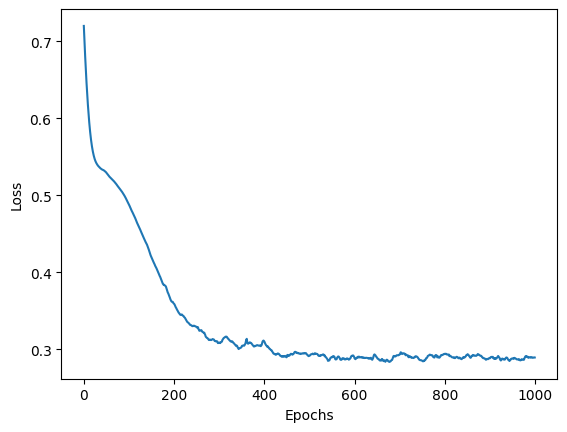

Training Losses are 
          0
0  0.760673
1  0.755608
2  0.750623
3  0.745716
4  0.740839
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2788  256]
 [ 276  680]]
Accuracy: 0.8670, Precision: 0.7265, Recall: 0.7113, F1-score: 0.7188

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2793  251]
 [ 268  688]]
Accuracy: 0.8702, Precision: 0.7327, Recall: 0.7197, F1-score: 0.7261



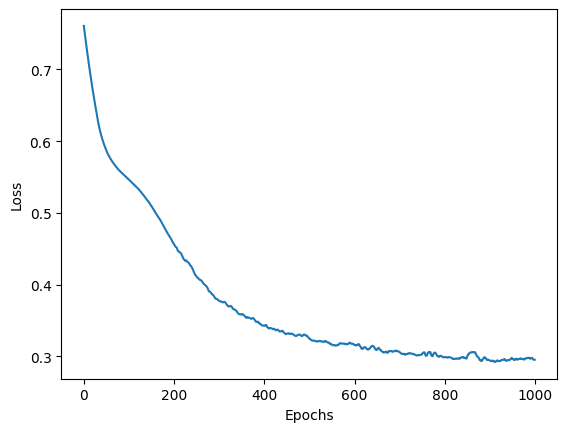

Training Losses are 
          0
0  0.695473
1  0.688528
2  0.681858
3  0.675401
4  0.669152
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2843  201]
 [ 363  593]]
Accuracy: 0.8590, Precision: 0.7469, Recall: 0.6203, F1-score: 0.6777

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2846  198]
 [ 362  594]]
Accuracy: 0.8600, Precision: 0.7500, Recall: 0.6213, F1-score: 0.6796



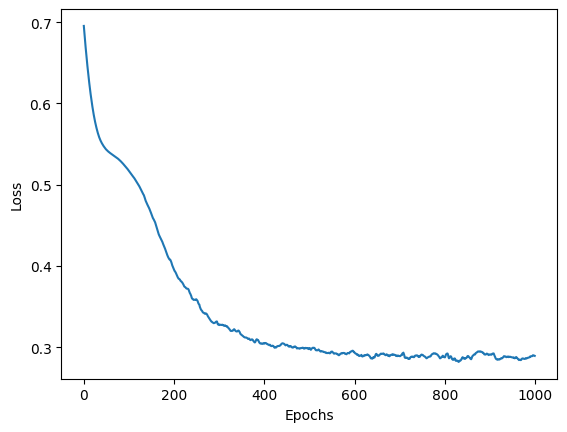

Training Losses are 
          0
0  0.596956
1  0.590339
2  0.584242
3  0.578624
4  0.573417
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2810  234]
 [ 305  651]]
Accuracy: 0.8652, Precision: 0.7356, Recall: 0.6810, F1-score: 0.7072

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2826  218]
 [ 291  665]]
Accuracy: 0.8728, Precision: 0.7531, Recall: 0.6956, F1-score: 0.7232



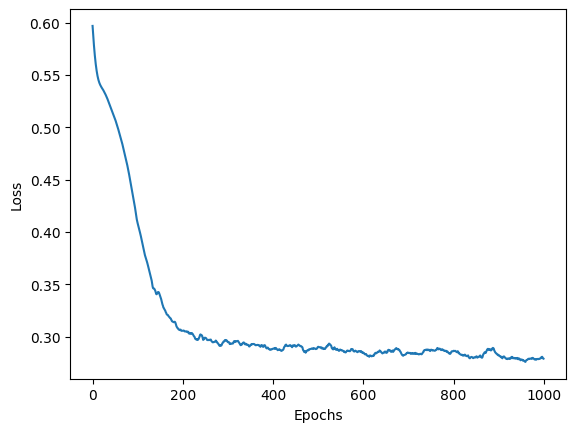

Training Losses are 
          0
0  0.744583
1  0.726423
2  0.709204
3  0.692958
4  0.677714
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2826  218]
 [ 314  642]]
Accuracy: 0.8670, Precision: 0.7465, Recall: 0.6715, F1-score: 0.7070

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2826  218]
 [ 294  662]]
Accuracy: 0.8720, Precision: 0.7523, Recall: 0.6925, F1-score: 0.7211



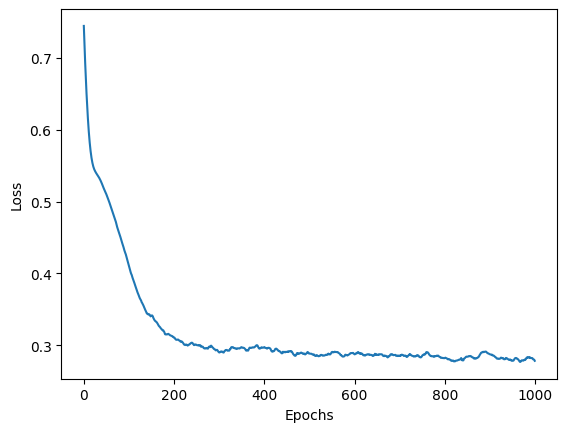

In [23]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(33,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [24]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.584601
1  0.583651
2  0.582720
3  0.581804
4  0.580904
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[2956   88]
 [ 498  458]]
Accuracy: 0.8535, Precision: 0.8388, Recall: 0.4791, F1-score: 0.6099

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[2960   84]
 [ 498  458]]
Accuracy: 0.8545, Precision: 0.8450, Recall: 0.4791, F1-score: 0.6115



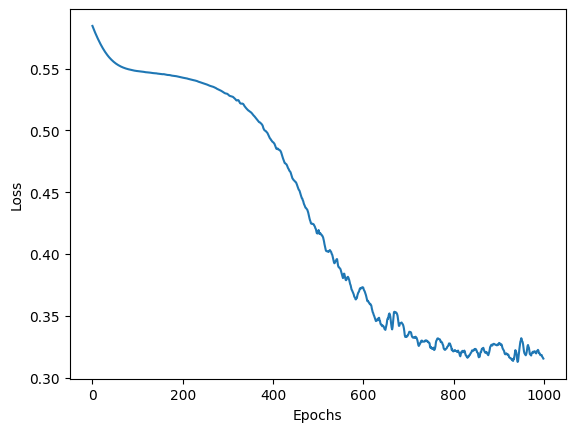

Training Losses are 
          0
0  0.646006
1  0.643721
2  0.641469
3  0.639244
4  0.637050
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[2724  320]
 [ 237  719]]
Accuracy: 0.8608, Precision: 0.6920, Recall: 0.7521, F1-score: 0.7208

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[2712  332]
 [ 242  714]]
Accuracy: 0.8565, Precision: 0.6826, Recall: 0.7469, F1-score: 0.7133



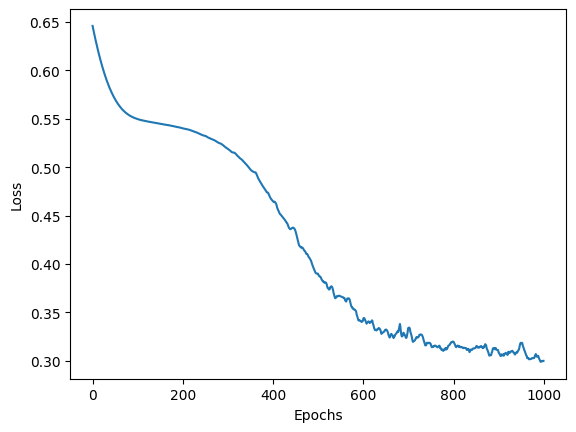

Training Losses are 
          0
0  0.749091
1  0.742665
2  0.736349
3  0.730150
4  0.724073
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[2660  384]
 [ 188  768]]
Accuracy: 0.8570, Precision: 0.6667, Recall: 0.8033, F1-score: 0.7287

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[2645  399]
 [ 187  769]]
Accuracy: 0.8535, Precision: 0.6584, Recall: 0.8044, F1-score: 0.7241



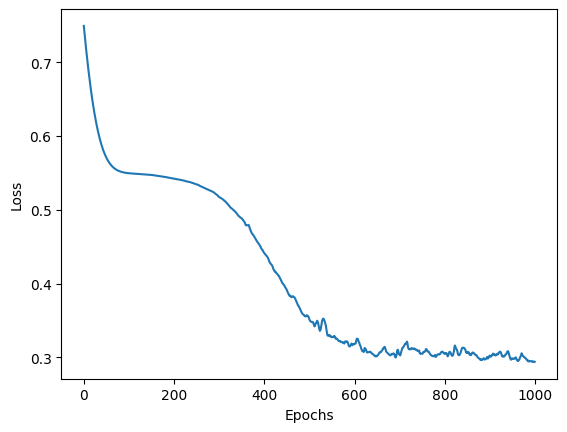

Training Losses are 
          0
0  0.728763
1  0.717369
2  0.706361
3  0.695768
4  0.685594
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2786  258]
 [ 272  684]]
Accuracy: 0.8675, Precision: 0.7261, Recall: 0.7155, F1-score: 0.7208

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2778  266]
 [ 268  688]]
Accuracy: 0.8665, Precision: 0.7212, Recall: 0.7197, F1-score: 0.7204



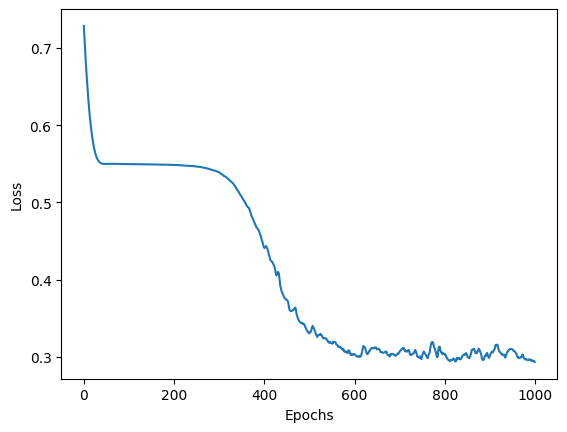

Training Losses are 
          0
0  0.775815
1  0.773035
2  0.770296
3  0.767584
4  0.764892
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2850  194]
 [ 366  590]]
Accuracy: 0.8600, Precision: 0.7526, Recall: 0.6172, F1-score: 0.6782

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2850  194]
 [ 362  594]]
Accuracy: 0.8610, Precision: 0.7538, Recall: 0.6213, F1-score: 0.6812



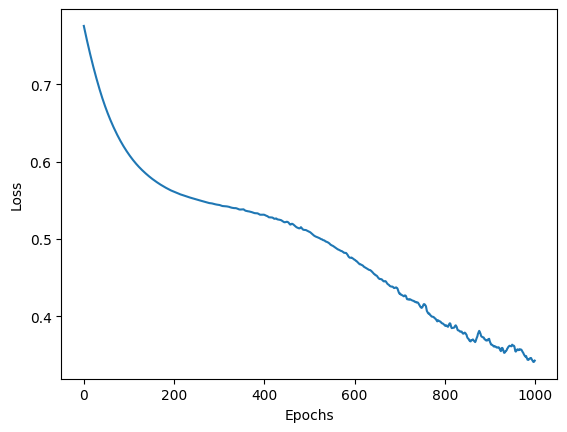

Training Losses are 
          0
0  0.687372
1  0.683967
2  0.680598
3  0.677276
4  0.673998
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2630  414]
 [ 156  800]]
Accuracy: 0.8575, Precision: 0.6590, Recall: 0.8368, F1-score: 0.7373

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2622  422]
 [ 155  801]]
Accuracy: 0.8558, Precision: 0.6549, Recall: 0.8379, F1-score: 0.7352



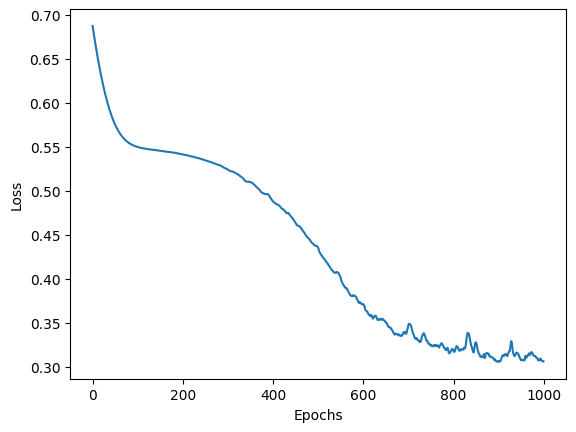

Training Losses are 
          0
0  0.571214
1  0.568916
2  0.566755
3  0.564730
4  0.562843
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2753  291]
 [ 239  717]]
Accuracy: 0.8675, Precision: 0.7113, Recall: 0.7500, F1-score: 0.7301

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2754  290]
 [ 252  704]]
Accuracy: 0.8645, Precision: 0.7082, Recall: 0.7364, F1-score: 0.7221



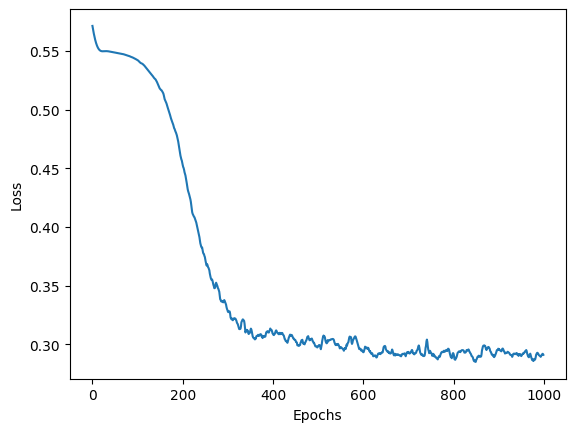

Training Losses are 
          0
0  0.688299
1  0.678008
2  0.668160
3  0.658765
4  0.649818
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2866  178]
 [ 381  575]]
Accuracy: 0.8602, Precision: 0.7636, Recall: 0.6015, F1-score: 0.6729

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2846  198]
 [ 388  568]]
Accuracy: 0.8535, Precision: 0.7415, Recall: 0.5941, F1-score: 0.6597



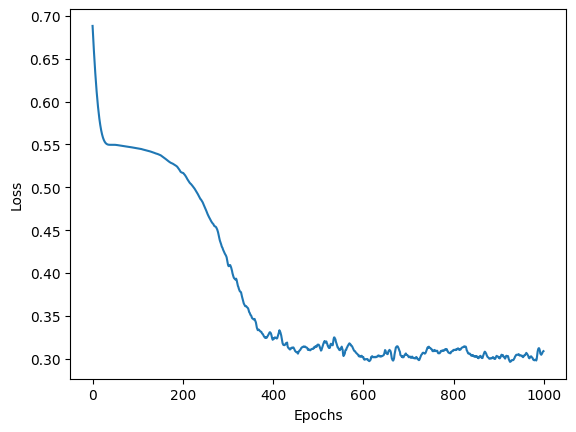

Training Losses are 
          0
0  0.629236
1  0.627087
2  0.624966
3  0.622878
4  0.620830
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2793  251]
 [ 298  658]]
Accuracy: 0.8628, Precision: 0.7239, Recall: 0.6883, F1-score: 0.7056

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2812  232]
 [ 312  644]]
Accuracy: 0.8640, Precision: 0.7352, Recall: 0.6736, F1-score: 0.7031



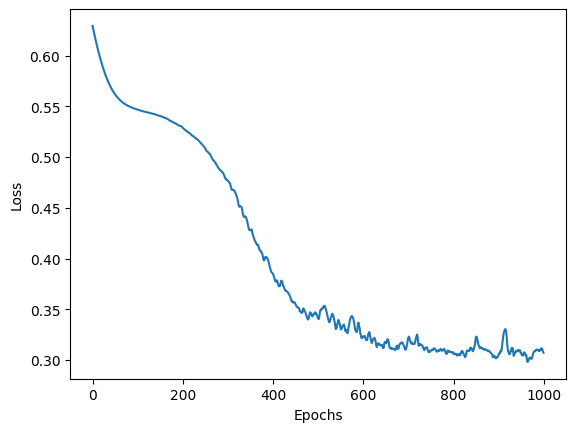

Training Losses are 
          0
0  0.598208
1  0.595679
2  0.593229
3  0.590842
4  0.588515
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2860  184]
 [ 332  624]]
Accuracy: 0.8710, Precision: 0.7723, Recall: 0.6527, F1-score: 0.7075

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2873  171]
 [ 343  613]]
Accuracy: 0.8715, Precision: 0.7819, Recall: 0.6412, F1-score: 0.7046



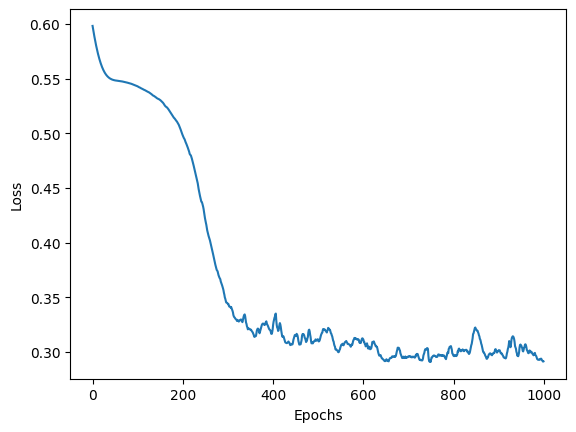

Training Losses are 
          0
0  0.692624
1  0.684849
2  0.677308
3  0.670007
4  0.662954
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2927  117]
 [ 426  530]]
Accuracy: 0.8642, Precision: 0.8192, Recall: 0.5544, F1-score: 0.6613

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2937  107]
 [ 434  522]]
Accuracy: 0.8648, Precision: 0.8299, Recall: 0.5460, F1-score: 0.6587



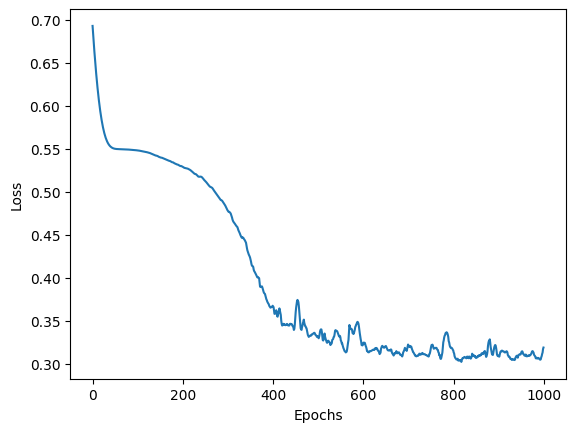

Training Losses are 
          0
0  0.647705
1  0.637790
2  0.628437
3  0.619663
4  0.611466
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2814  230]
 [ 310  646]]
Accuracy: 0.8650, Precision: 0.7374, Recall: 0.6757, F1-score: 0.7052

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2821  223]
 [ 301  655]]
Accuracy: 0.8690, Precision: 0.7460, Recall: 0.6851, F1-score: 0.7143



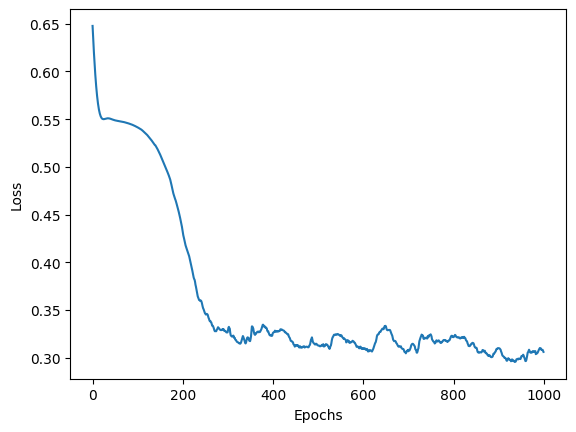

Training Losses are 
          0
0  0.637840
1  0.633984
2  0.630225
3  0.626572
4  0.623028
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2845  199]
 [ 329  627]]
Accuracy: 0.8680, Precision: 0.7591, Recall: 0.6559, F1-score: 0.7037

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2853  191]
 [ 318  638]]
Accuracy: 0.8728, Precision: 0.7696, Recall: 0.6674, F1-score: 0.7148



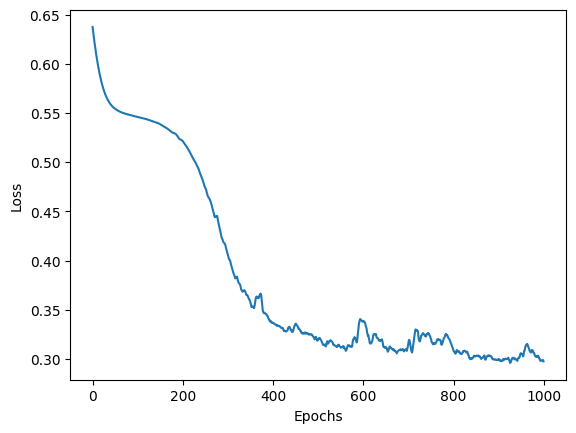

Training Losses are 
          0
0  0.849660
1  0.839271
2  0.829135
3  0.819268
4  0.809703
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2812  232]
 [ 295  661]]
Accuracy: 0.8682, Precision: 0.7402, Recall: 0.6914, F1-score: 0.7150

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2827  217]
 [ 310  646]]
Accuracy: 0.8682, Precision: 0.7486, Recall: 0.6757, F1-score: 0.7103



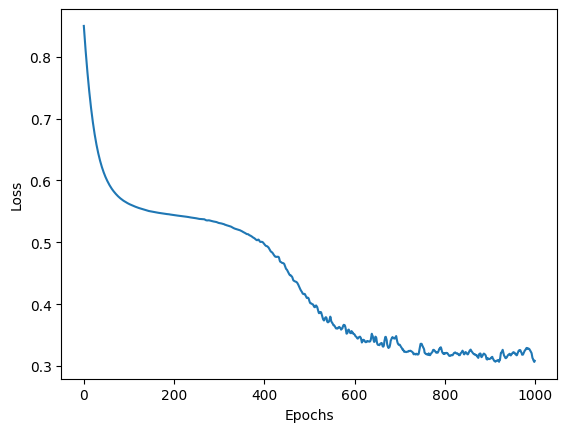

Training Losses are 
          0
0  0.653052
1  0.644388
2  0.636126
3  0.628281
4  0.620839
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2659  385]
 [ 160  796]]
Accuracy: 0.8638, Precision: 0.6740, Recall: 0.8326, F1-score: 0.7450

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2643  401]
 [ 155  801]]
Accuracy: 0.8610, Precision: 0.6664, Recall: 0.8379, F1-score: 0.7424



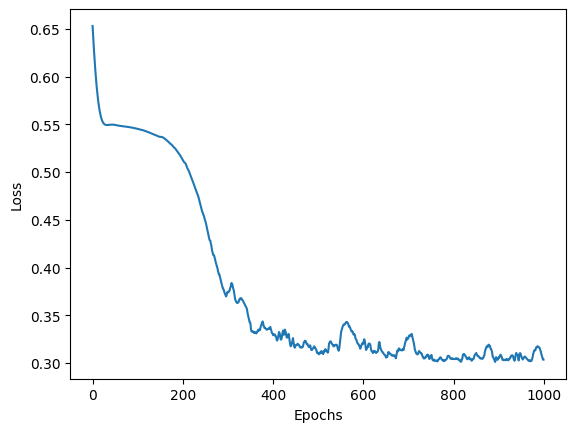

Training Losses are 
          0
0  0.753181
1  0.732561
2  0.713107
3  0.694840
4  0.677760
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2862  182]
 [ 365  591]]
Accuracy: 0.8632, Precision: 0.7646, Recall: 0.6182, F1-score: 0.6836

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2860  184]
 [ 371  585]]
Accuracy: 0.8612, Precision: 0.7607, Recall: 0.6119, F1-score: 0.6783



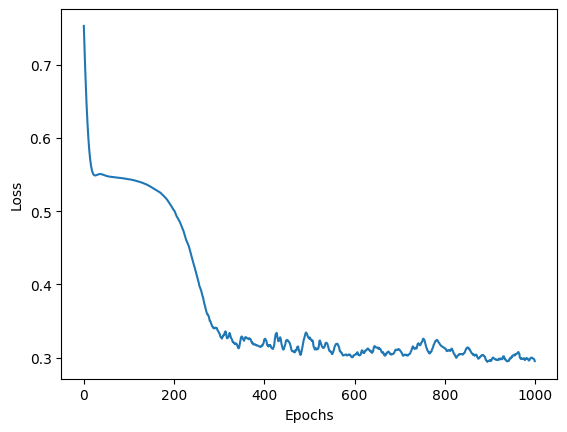

Training Losses are 
          0
0  0.629046
1  0.627790
2  0.626546
3  0.625309
4  0.624087
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2860  184]
 [ 354  602]]
Accuracy: 0.8655, Precision: 0.7659, Recall: 0.6297, F1-score: 0.6912

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2880  164]
 [ 342  614]]
Accuracy: 0.8735, Precision: 0.7892, Recall: 0.6423, F1-score: 0.7082



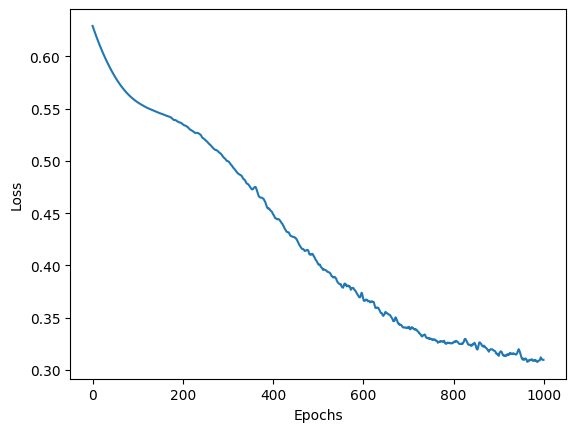

Training Losses are 
          0
0  0.643735
1  0.641331
2  0.638945
3  0.636599
4  0.634284
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2807  237]
 [ 283  673]]
Accuracy: 0.8700, Precision: 0.7396, Recall: 0.7040, F1-score: 0.7213

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2817  227]
 [ 257  699]]
Accuracy: 0.8790, Precision: 0.7549, Recall: 0.7312, F1-score: 0.7428



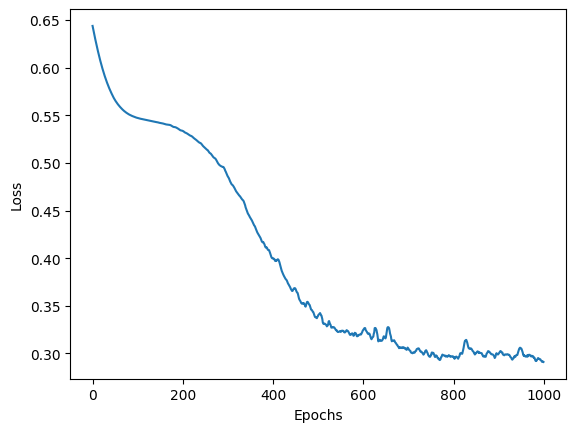

Training Losses are 
          0
0  0.772870
1  0.766200
2  0.759635
3  0.753180
4  0.746845
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2867  177]
 [ 356  600]]
Accuracy: 0.8668, Precision: 0.7722, Recall: 0.6276, F1-score: 0.6924

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2865  179]
 [ 343  613]]
Accuracy: 0.8695, Precision: 0.7740, Recall: 0.6412, F1-score: 0.7014



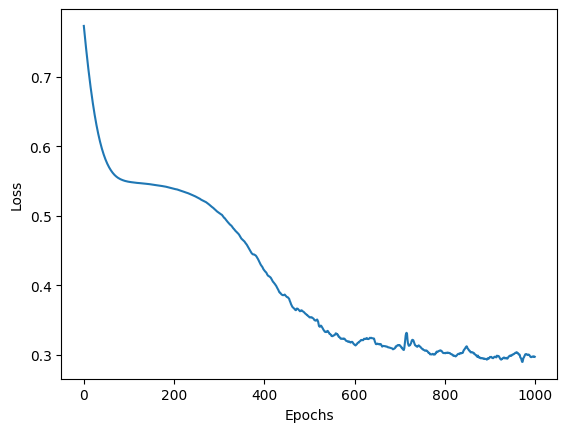

Training Losses are 
          0
0  0.596491
1  0.591136
2  0.586136
3  0.581484
4  0.577181
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2776  268]
 [ 273  683]]
Accuracy: 0.8648, Precision: 0.7182, Recall: 0.7144, F1-score: 0.7163

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2784  260]
 [ 292  664]]
Accuracy: 0.8620, Precision: 0.7186, Recall: 0.6946, F1-score: 0.7064



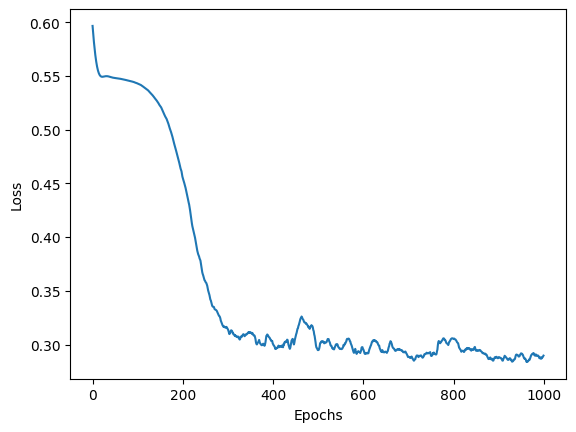

Training Losses are 
          0
0  0.670510
1  0.668697
2  0.666899
3  0.665113
4  0.663339
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2719  325]
 [ 229  727]]
Accuracy: 0.8615, Precision: 0.6911, Recall: 0.7605, F1-score: 0.7241

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2717  327]
 [ 218  738]]
Accuracy: 0.8638, Precision: 0.6930, Recall: 0.7720, F1-score: 0.7303



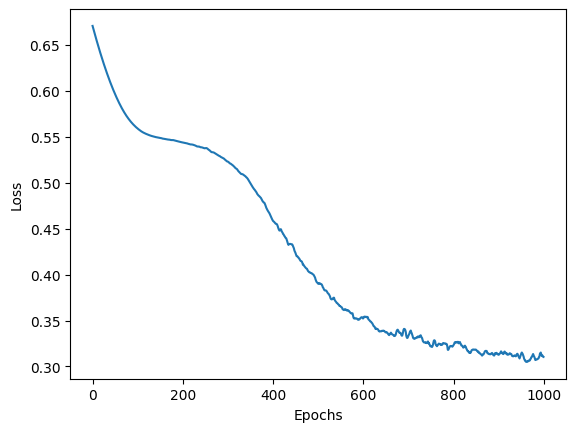

Training Losses are 
          0
0  0.638947
1  0.636205
2  0.633510
3  0.630856
4  0.628247
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2857  187]
 [ 368  588]]
Accuracy: 0.8612, Precision: 0.7587, Recall: 0.6151, F1-score: 0.6794

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2860  184]
 [ 350  606]]
Accuracy: 0.8665, Precision: 0.7671, Recall: 0.6339, F1-score: 0.6942



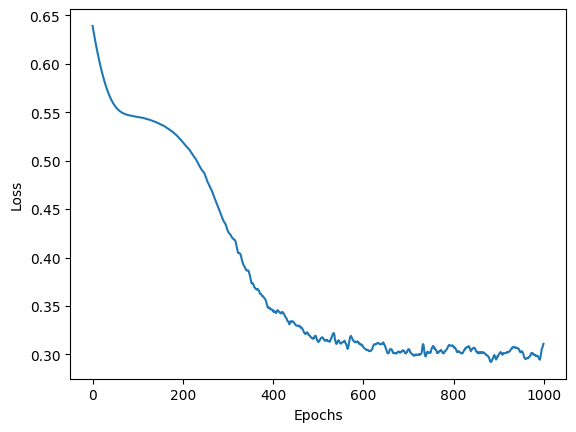

Training Losses are 
          0
0  0.773896
1  0.766392
2  0.759017
3  0.751786
4  0.744691
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2791  253]
 [ 268  688]]
Accuracy: 0.8698, Precision: 0.7311, Recall: 0.7197, F1-score: 0.7254

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2795  249]
 [ 275  681]]
Accuracy: 0.8690, Precision: 0.7323, Recall: 0.7123, F1-score: 0.7222



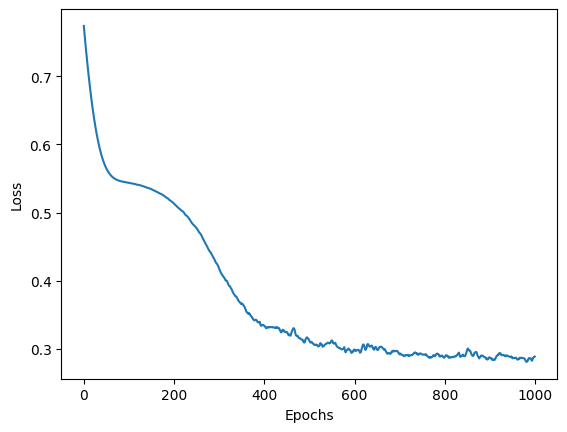

Training Losses are 
          0
0  0.721381
1  0.709428
2  0.697941
3  0.686925
4  0.676389
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2629  415]
 [ 165  791]]
Accuracy: 0.8550, Precision: 0.6559, Recall: 0.8274, F1-score: 0.7317

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2603  441]
 [ 172  784]]
Accuracy: 0.8468, Precision: 0.6400, Recall: 0.8201, F1-score: 0.7189



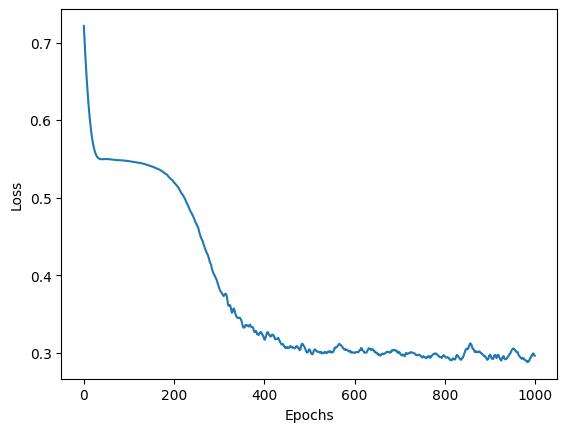

Training Losses are 
          0
0  0.830134
1  0.825600
2  0.821121
3  0.816683
4  0.812314
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2801  243]
 [ 287  669]]
Accuracy: 0.8675, Precision: 0.7336, Recall: 0.6998, F1-score: 0.7163

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2812  232]
 [ 288  668]]
Accuracy: 0.8700, Precision: 0.7422, Recall: 0.6987, F1-score: 0.7198



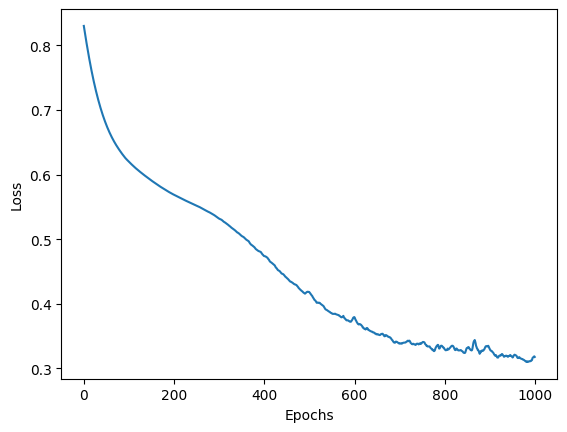

Training Losses are 
          0
0  0.629292
1  0.625704
2  0.622203
3  0.618787
4  0.615458
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2900  144]
 [ 413  543]]
Accuracy: 0.8608, Precision: 0.7904, Recall: 0.5680, F1-score: 0.6610

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2904  140]
 [ 406  550]]
Accuracy: 0.8635, Precision: 0.7971, Recall: 0.5753, F1-score: 0.6683



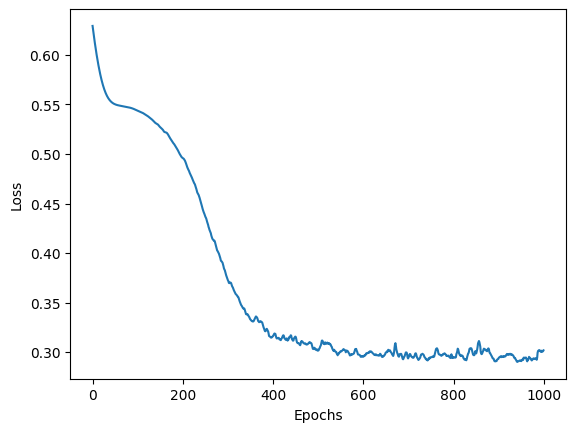

Training Losses are 
          0
0  0.642121
1  0.636386
2  0.630836
3  0.625481
4  0.620325
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2807  237]
 [ 284  672]]
Accuracy: 0.8698, Precision: 0.7393, Recall: 0.7029, F1-score: 0.7206

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2819  225]
 [ 273  683]]
Accuracy: 0.8755, Precision: 0.7522, Recall: 0.7144, F1-score: 0.7328



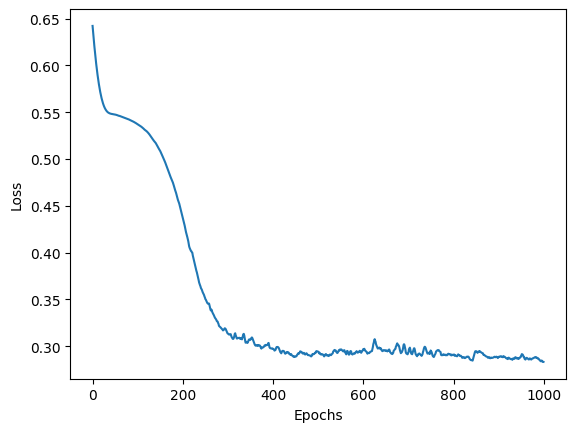

Training Losses are 
          0
0  0.722889
1  0.708949
2  0.695630
3  0.682951
4  0.670921
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2812  232]
 [ 326  630]]
Accuracy: 0.8605, Precision: 0.7309, Recall: 0.6590, F1-score: 0.6931

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2805  239]
 [ 328  628]]
Accuracy: 0.8582, Precision: 0.7243, Recall: 0.6569, F1-score: 0.6890



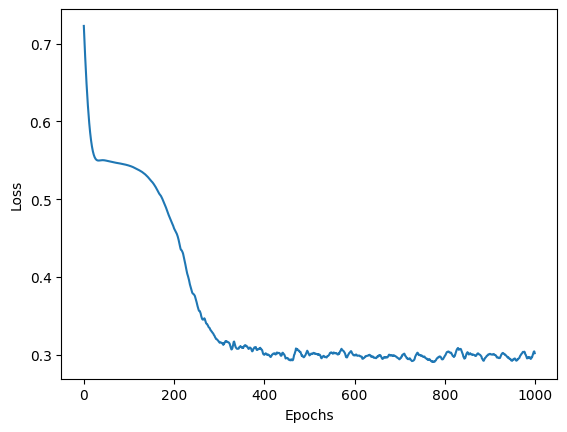

Training Losses are 
          0
0  0.829479
1  0.821686
2  0.814030
3  0.806514
4  0.799145
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2873  171]
 [ 351  605]]
Accuracy: 0.8695, Precision: 0.7796, Recall: 0.6328, F1-score: 0.6986

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2861  183]
 [ 363  593]]
Accuracy: 0.8635, Precision: 0.7642, Recall: 0.6203, F1-score: 0.6848



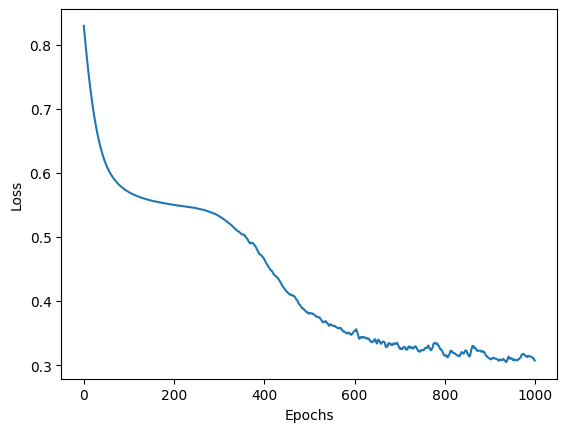

Training Losses are 
          0
0  0.745923
1  0.736832
2  0.727994
3  0.719425
4  0.711109
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2843  201]
 [ 319  637]]
Accuracy: 0.8700, Precision: 0.7601, Recall: 0.6663, F1-score: 0.7101

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2847  197]
 [ 334  622]]
Accuracy: 0.8672, Precision: 0.7595, Recall: 0.6506, F1-score: 0.7008



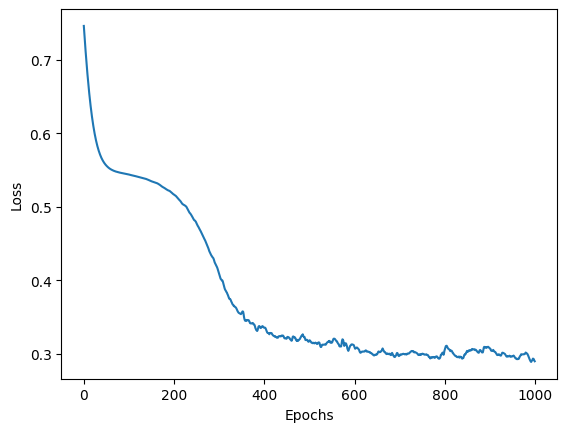

Training Losses are 
          0
0  0.744187
1  0.731725
2  0.719714
3  0.708193
4  0.697155
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2883  161]
 [ 353  603]]
Accuracy: 0.8715, Precision: 0.7893, Recall: 0.6308, F1-score: 0.7012

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2868  176]
 [ 371  585]]
Accuracy: 0.8632, Precision: 0.7687, Recall: 0.6119, F1-score: 0.6814



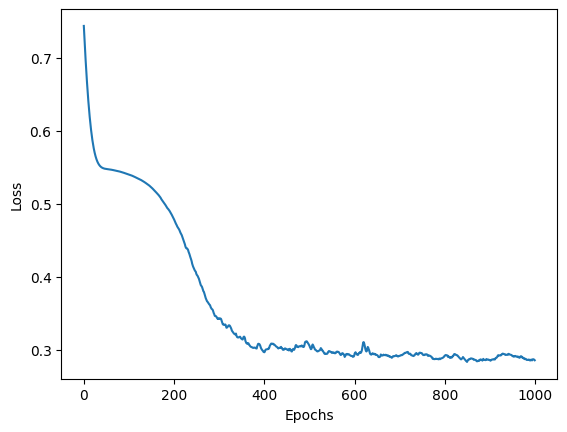

Training Losses are 
          0
0  0.690219
1  0.673785
2  0.658478
3  0.644315
4  0.631282
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2790  254]
 [ 289  667]]
Accuracy: 0.8642, Precision: 0.7242, Recall: 0.6977, F1-score: 0.7107

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2775  269]
 [ 284  672]]
Accuracy: 0.8618, Precision: 0.7141, Recall: 0.7029, F1-score: 0.7085



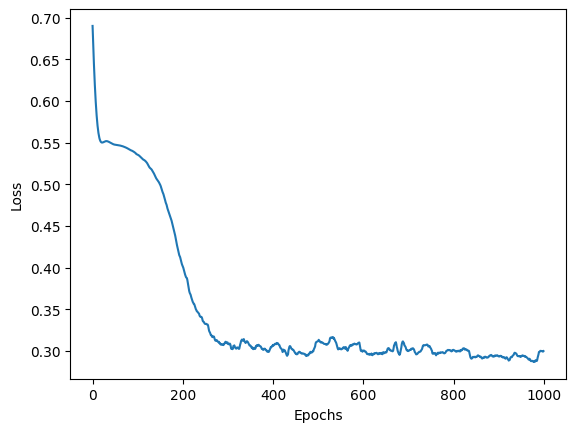

Training Losses are 
          0
0  0.636665
1  0.635030
2  0.633417
3  0.631830
4  0.630276
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2805  239]
 [ 329  627]]
Accuracy: 0.8580, Precision: 0.7240, Recall: 0.6559, F1-score: 0.6883

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2795  249]
 [ 341  615]]
Accuracy: 0.8525, Precision: 0.7118, Recall: 0.6433, F1-score: 0.6758



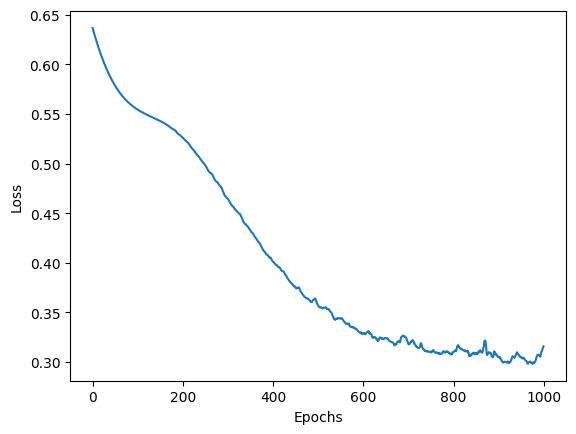

Training Losses are 
          0
0  0.648418
1  0.645453
2  0.642551
3  0.639691
4  0.636884
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2812  232]
 [ 310  646]]
Accuracy: 0.8645, Precision: 0.7358, Recall: 0.6757, F1-score: 0.7045

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2816  228]
 [ 280  676]]
Accuracy: 0.8730, Precision: 0.7478, Recall: 0.7071, F1-score: 0.7269



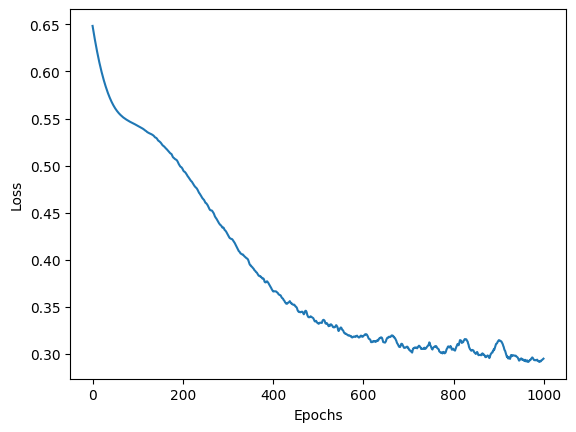

Training Losses are 
          0
0  0.724609
1  0.718571
2  0.712665
3  0.706879
4  0.701210
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2694  350]
 [ 220  736]]
Accuracy: 0.8575, Precision: 0.6777, Recall: 0.7699, F1-score: 0.7209

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2712  332]
 [ 223  733]]
Accuracy: 0.8612, Precision: 0.6883, Recall: 0.7667, F1-score: 0.7254



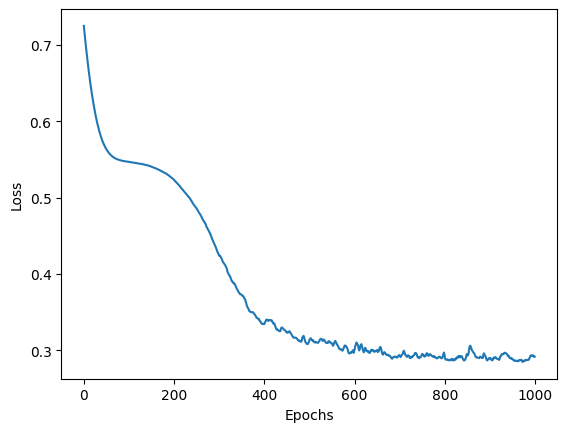

Training Losses are 
          0
0  0.709988
1  0.699353
2  0.689108
3  0.679261
4  0.669821
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2824  220]
 [ 315  641]]
Accuracy: 0.8662, Precision: 0.7445, Recall: 0.6705, F1-score: 0.7056

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2826  218]
 [ 317  639]]
Accuracy: 0.8662, Precision: 0.7456, Recall: 0.6684, F1-score: 0.7049



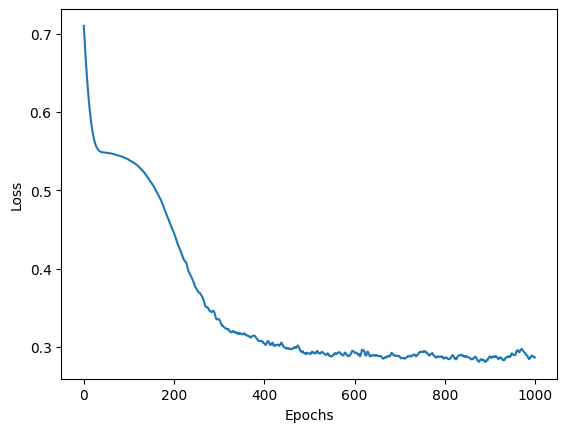

Training Losses are 
          0
0  0.623748
1  0.622140
2  0.620558
3  0.618996
4  0.617460
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2720  324]
 [ 222  734]]
Accuracy: 0.8635, Precision: 0.6938, Recall: 0.7678, F1-score: 0.7289

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2738  306]
 [ 227  729]]
Accuracy: 0.8668, Precision: 0.7043, Recall: 0.7626, F1-score: 0.7323



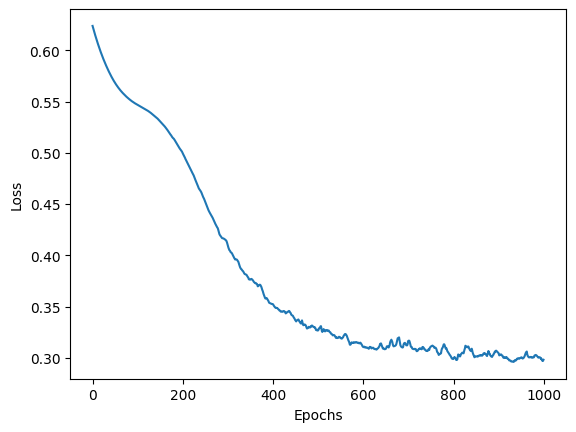

Training Losses are 
          0
0  0.573844
1  0.572138
2  0.570497
3  0.568909
4  0.567385
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2809  235]
 [ 297  659]]
Accuracy: 0.8670, Precision: 0.7371, Recall: 0.6893, F1-score: 0.7124

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2818  226]
 [ 292  664]]
Accuracy: 0.8705, Precision: 0.7461, Recall: 0.6946, F1-score: 0.7194



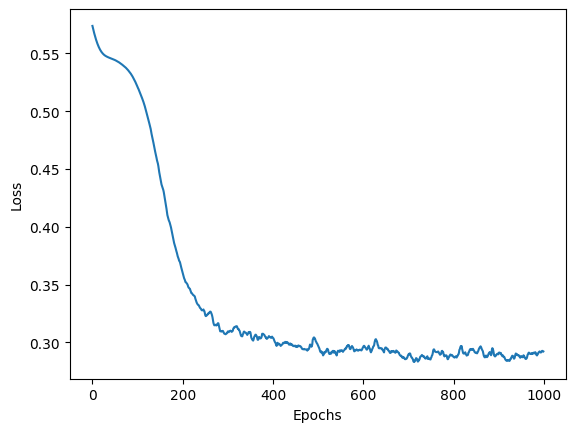

Training Losses are 
          0
0  0.820777
1  0.812281
2  0.803949
3  0.795794
4  0.787808
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2827  217]
 [ 295  661]]
Accuracy: 0.8720, Precision: 0.7528, Recall: 0.6914, F1-score: 0.7208

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2826  218]
 [ 307  649]]
Accuracy: 0.8688, Precision: 0.7486, Recall: 0.6789, F1-score: 0.7120



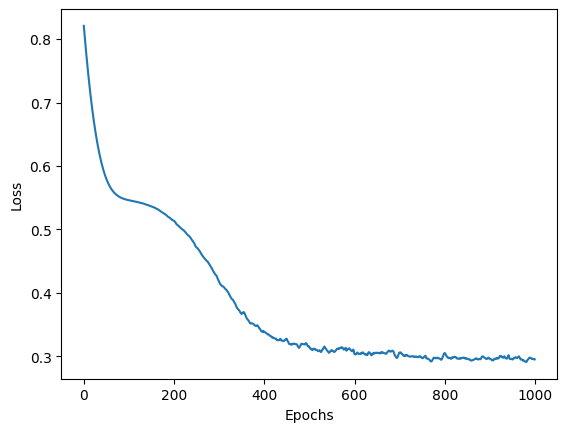

Training Losses are 
          0
0  0.760464
1  0.746390
2  0.732811
3  0.719746
4  0.707197
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2830  214]
 [ 300  656]]
Accuracy: 0.8715, Precision: 0.7540, Recall: 0.6862, F1-score: 0.7185

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2828  216]
 [ 314  642]]
Accuracy: 0.8675, Precision: 0.7483, Recall: 0.6715, F1-score: 0.7078



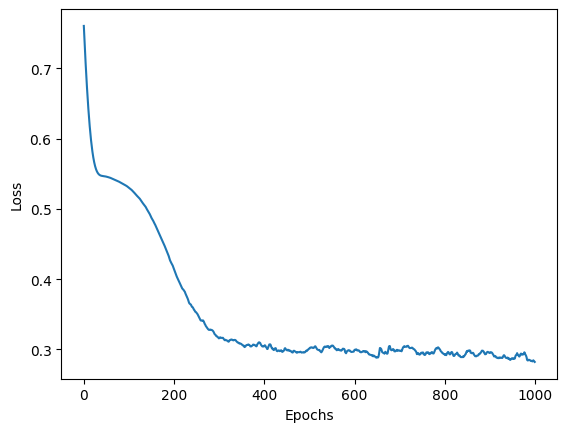

Training Losses are 
          0
0  0.668884
1  0.665635
2  0.662496
3  0.659422
4  0.656393
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2815  229]
 [ 273  683]]
Accuracy: 0.8745, Precision: 0.7489, Recall: 0.7144, F1-score: 0.7313

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2813  231]
 [ 275  681]]
Accuracy: 0.8735, Precision: 0.7467, Recall: 0.7123, F1-score: 0.7291



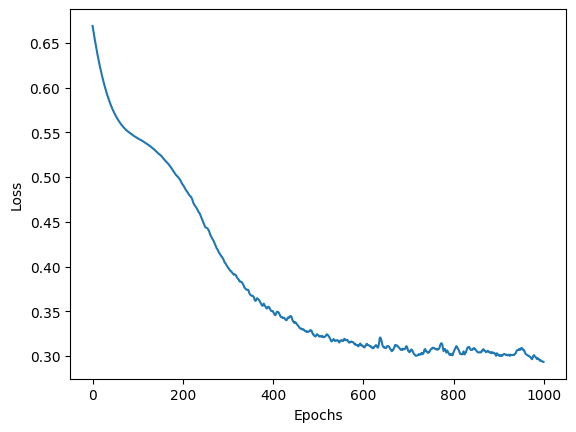

Training Losses are 
          0
0  0.655895
1  0.651490
2  0.647187
3  0.642996
4  0.638914
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2816  228]
 [ 322  634]]
Accuracy: 0.8625, Precision: 0.7355, Recall: 0.6632, F1-score: 0.6975

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2814  230]
 [ 330  626]]
Accuracy: 0.8600, Precision: 0.7313, Recall: 0.6548, F1-score: 0.6909



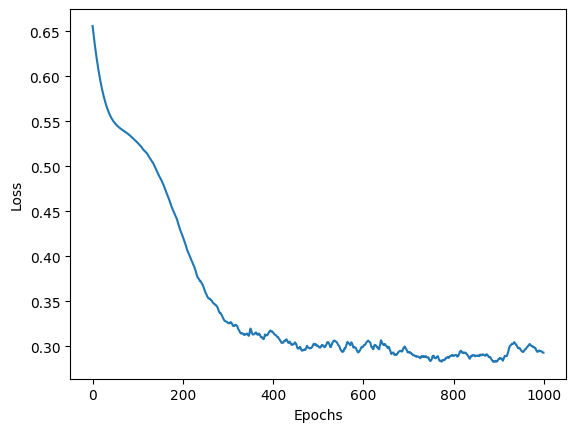

Training Losses are 
          0
0  0.664757
1  0.658579
2  0.652577
3  0.646747
4  0.641094
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2840  204]
 [ 323  633]]
Accuracy: 0.8682, Precision: 0.7563, Recall: 0.6621, F1-score: 0.7061

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2844  200]
 [ 320  636]]
Accuracy: 0.8700, Precision: 0.7608, Recall: 0.6653, F1-score: 0.7098



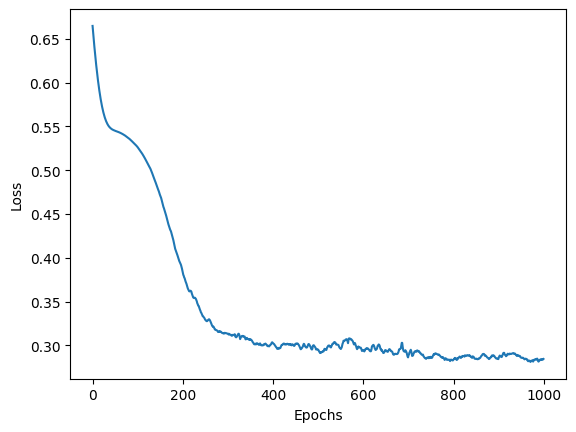

Training Losses are 
          0
0  0.839605
1  0.820301
2  0.801728
3  0.783884
4  0.766773
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2802  242]
 [ 307  649]]
Accuracy: 0.8628, Precision: 0.7284, Recall: 0.6789, F1-score: 0.7028

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2784  260]
 [ 319  637]]
Accuracy: 0.8552, Precision: 0.7101, Recall: 0.6663, F1-score: 0.6875



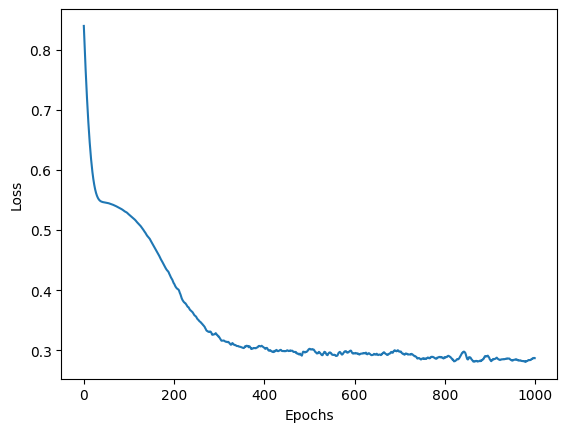

Training Losses are 
          0
0  0.631478
1  0.628651
2  0.625866
3  0.623118
4  0.620419
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2707  337]
 [ 249  707]]
Accuracy: 0.8535, Precision: 0.6772, Recall: 0.7395, F1-score: 0.7070

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2698  346]
 [ 225  731]]
Accuracy: 0.8572, Precision: 0.6787, Recall: 0.7646, F1-score: 0.7191



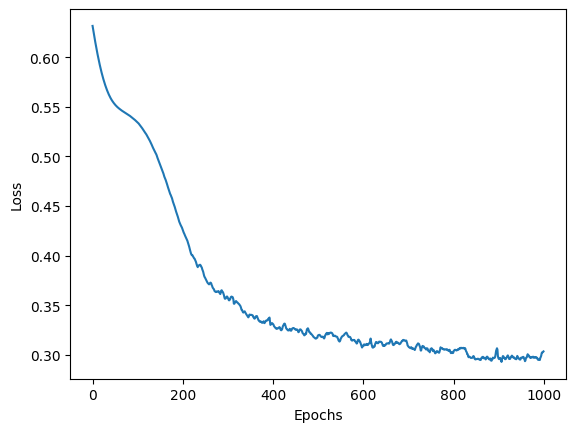

Training Losses are 
          0
0  0.656670
1  0.650206
2  0.643920
3  0.637850
4  0.632000
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2760  284]
 [ 237  719]]
Accuracy: 0.8698, Precision: 0.7168, Recall: 0.7521, F1-score: 0.7340

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2741  303]
 [ 260  696]]
Accuracy: 0.8592, Precision: 0.6967, Recall: 0.7280, F1-score: 0.7120



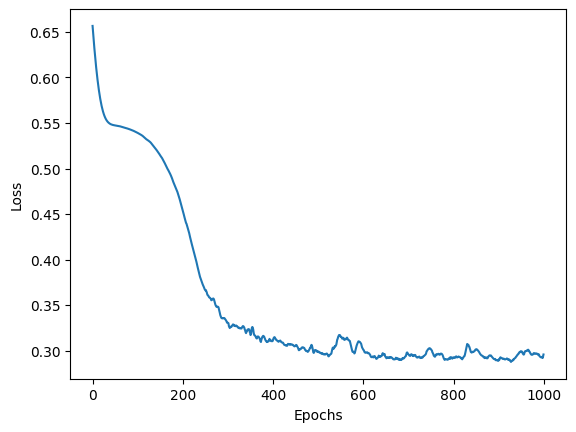

Training Losses are 
          0
0  0.585415
1  0.580062
2  0.575165
3  0.570717
4  0.566729
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2839  205]
 [ 316  640]]
Accuracy: 0.8698, Precision: 0.7574, Recall: 0.6695, F1-score: 0.7107

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2831  213]
 [ 311  645]]
Accuracy: 0.8690, Precision: 0.7517, Recall: 0.6747, F1-score: 0.7111



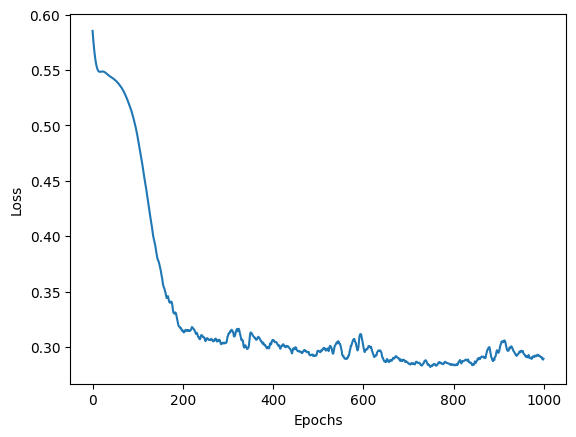

Training Losses are 
          0
0  0.665819
1  0.650431
2  0.636230
3  0.623232
4  0.611432
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2832  212]
 [ 326  630]]
Accuracy: 0.8655, Precision: 0.7482, Recall: 0.6590, F1-score: 0.7008

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2843  201]
 [ 321  635]]
Accuracy: 0.8695, Precision: 0.7596, Recall: 0.6642, F1-score: 0.7087



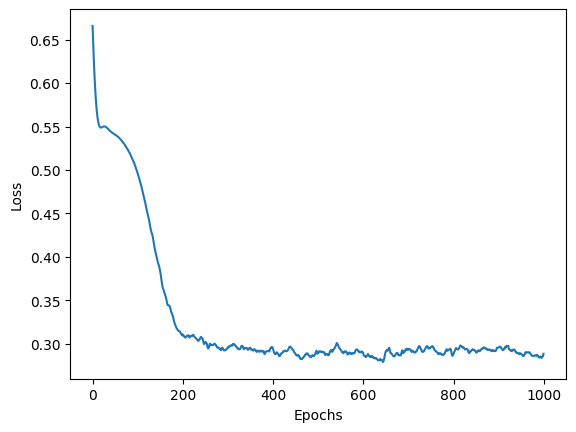

Training Losses are 
          0
0  0.803878
1  0.801224
2  0.798585
3  0.795964
4  0.793353
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2844  200]
 [ 327  629]]
Accuracy: 0.8682, Precision: 0.7587, Recall: 0.6579, F1-score: 0.7048

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2863  181]
 [ 333  623]]
Accuracy: 0.8715, Precision: 0.7749, Recall: 0.6517, F1-score: 0.7080



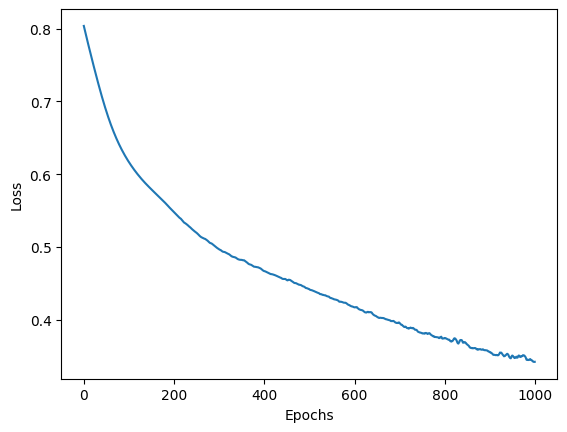

Training Losses are 
          0
0  0.627551
1  0.624901
2  0.622302
3  0.619745
4  0.617236
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2774  270]
 [ 250  706]]
Accuracy: 0.8700, Precision: 0.7234, Recall: 0.7385, F1-score: 0.7308

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2771  273]
 [ 249  707]]
Accuracy: 0.8695, Precision: 0.7214, Recall: 0.7395, F1-score: 0.7304



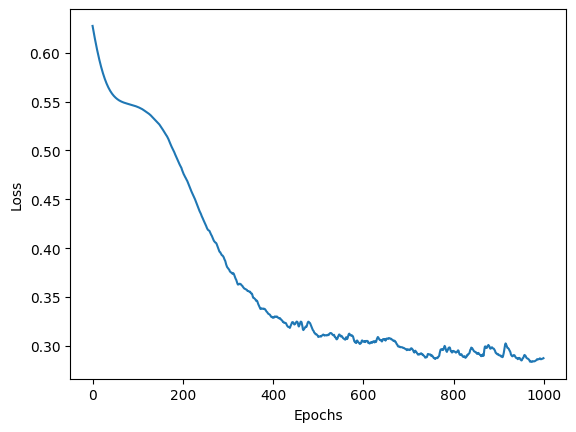

Training Losses are 
          0
0  0.908879
1  0.899457
2  0.890191
3  0.881081
4  0.872146
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2842  202]
 [ 325  631]]
Accuracy: 0.8682, Precision: 0.7575, Recall: 0.6600, F1-score: 0.7054

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2844  200]
 [ 329  627]]
Accuracy: 0.8678, Precision: 0.7582, Recall: 0.6559, F1-score: 0.7033



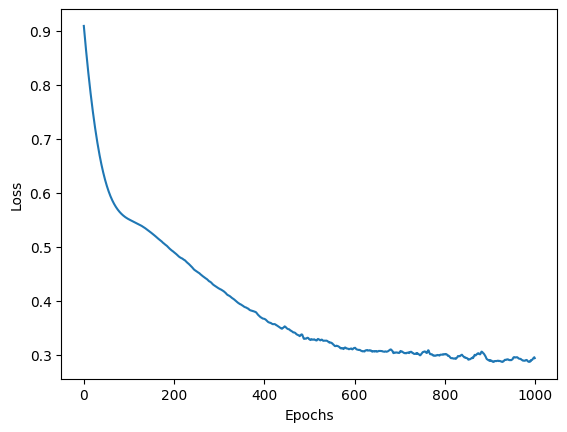

Training Losses are 
          0
0  0.795589
1  0.782544
2  0.769896
3  0.757644
4  0.745789
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2816  228]
 [ 303  653]]
Accuracy: 0.8672, Precision: 0.7412, Recall: 0.6831, F1-score: 0.7109

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2830  214]
 [ 296  660]]
Accuracy: 0.8725, Precision: 0.7551, Recall: 0.6904, F1-score: 0.7213



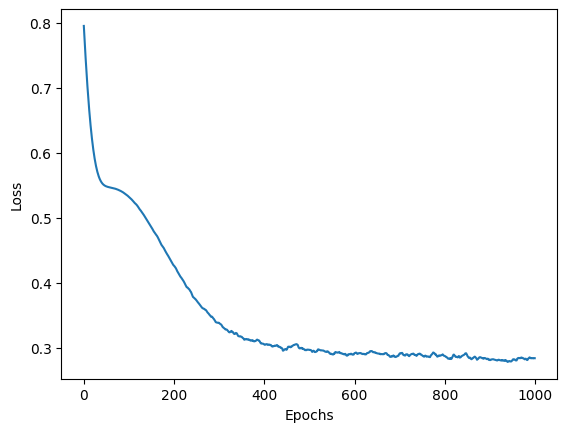

Training Losses are 
          0
0  0.613592
1  0.611673
2  0.609802
3  0.607965
4  0.606156
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2803  241]
 [ 282  674]]
Accuracy: 0.8692, Precision: 0.7366, Recall: 0.7050, F1-score: 0.7205

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2813  231]
 [ 280  676]]
Accuracy: 0.8722, Precision: 0.7453, Recall: 0.7071, F1-score: 0.7257



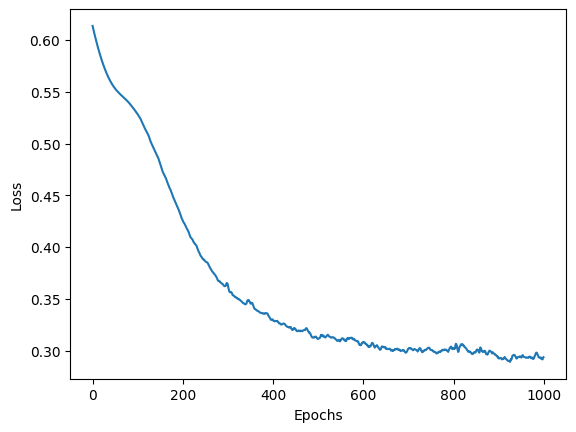

Training Losses are 
          0
0  0.740493
1  0.735297
2  0.730175
3  0.725145
4  0.720175
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2796  248]
 [ 270  686]]
Accuracy: 0.8705, Precision: 0.7345, Recall: 0.7176, F1-score: 0.7259

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2776  268]
 [ 283  673]]
Accuracy: 0.8622, Precision: 0.7152, Recall: 0.7040, F1-score: 0.7095



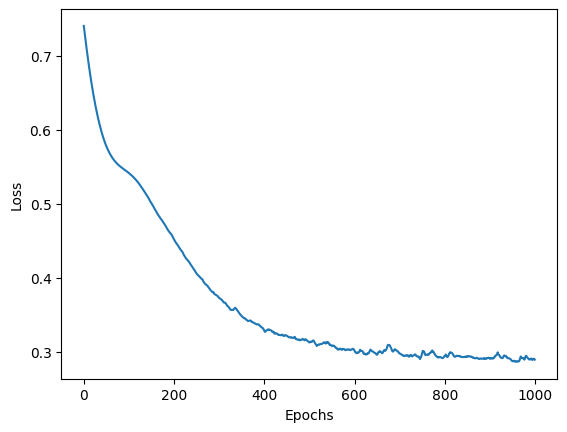

Training Losses are 
          0
0  0.733033
1  0.725169
2  0.717460
3  0.709924
4  0.702554
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2795  249]
 [ 284  672]]
Accuracy: 0.8668, Precision: 0.7296, Recall: 0.7029, F1-score: 0.7160

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2802  242]
 [ 288  668]]
Accuracy: 0.8675, Precision: 0.7341, Recall: 0.6987, F1-score: 0.7160



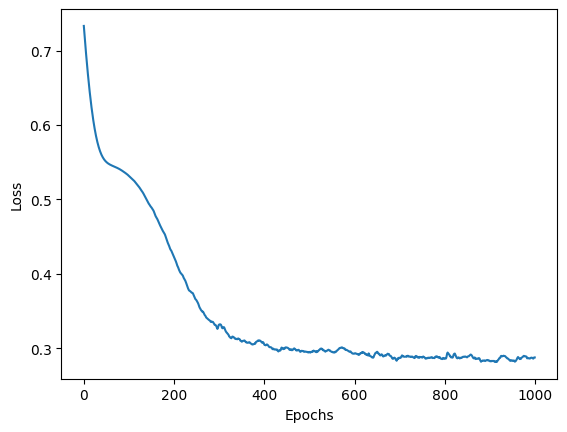

Training Losses are 
          0
0  0.750140
1  0.736363
2  0.723081
3  0.710311
4  0.698069
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2805  239]
 [ 286  670]]
Accuracy: 0.8688, Precision: 0.7371, Recall: 0.7008, F1-score: 0.7185

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2790  254]
 [ 273  683]]
Accuracy: 0.8682, Precision: 0.7289, Recall: 0.7144, F1-score: 0.7216



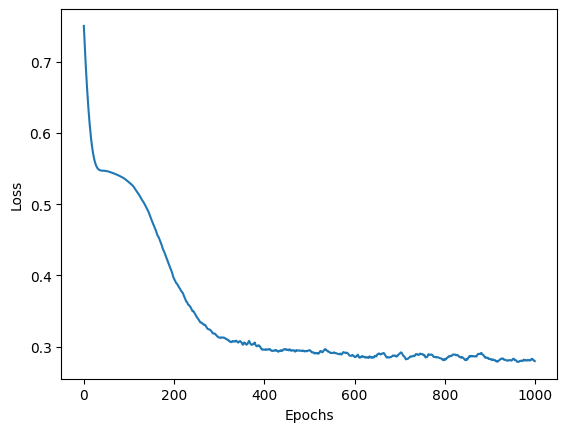

Training Losses are 
          0
0  0.738863
1  0.734185
2  0.729606
3  0.725128
4  0.720749
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2810  234]
 [ 288  668]]
Accuracy: 0.8695, Precision: 0.7406, Recall: 0.6987, F1-score: 0.7191

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2812  232]
 [ 304  652]]
Accuracy: 0.8660, Precision: 0.7376, Recall: 0.6820, F1-score: 0.7087



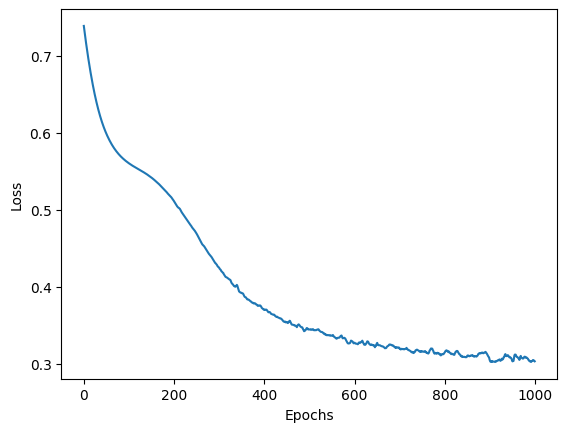

Training Losses are 
          0
0  0.731246
1  0.725569
2  0.720019
3  0.714573
4  0.709242
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2854  190]
 [ 368  588]]
Accuracy: 0.8605, Precision: 0.7558, Recall: 0.6151, F1-score: 0.6782

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2869  175]
 [ 354  602]]
Accuracy: 0.8678, Precision: 0.7748, Recall: 0.6297, F1-score: 0.6947



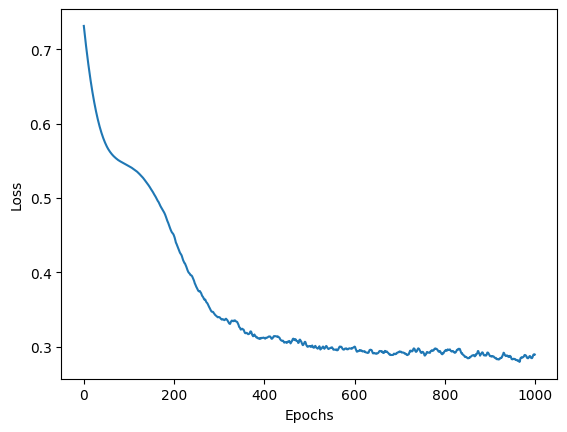

Training Losses are 
          0
0  0.730886
1  0.721593
2  0.712567
3  0.703824
4  0.695335
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2740  304]
 [ 255  701]]
Accuracy: 0.8602, Precision: 0.6975, Recall: 0.7333, F1-score: 0.7149

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2738  306]
 [ 243  713]]
Accuracy: 0.8628, Precision: 0.6997, Recall: 0.7458, F1-score: 0.7220



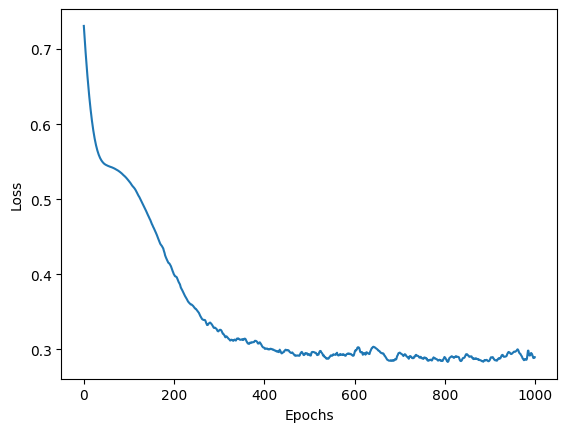

Training Losses are 
          0
0  0.730467
1  0.715271
2  0.700822
3  0.687109
4  0.674133
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2817  227]
 [ 313  643]]
Accuracy: 0.8650, Precision: 0.7391, Recall: 0.6726, F1-score: 0.7043

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2828  216]
 [ 323  633]]
Accuracy: 0.8652, Precision: 0.7456, Recall: 0.6621, F1-score: 0.7014



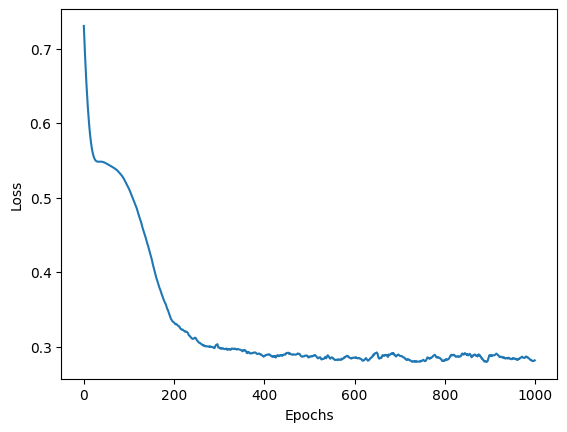

Training Losses are 
          0
0  0.659928
1  0.654628
2  0.649470
3  0.644464
4  0.639606
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2744  300]
 [ 240  716]]
Accuracy: 0.8650, Precision: 0.7047, Recall: 0.7490, F1-score: 0.7262

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2732  312]
 [ 237  719]]
Accuracy: 0.8628, Precision: 0.6974, Recall: 0.7521, F1-score: 0.7237



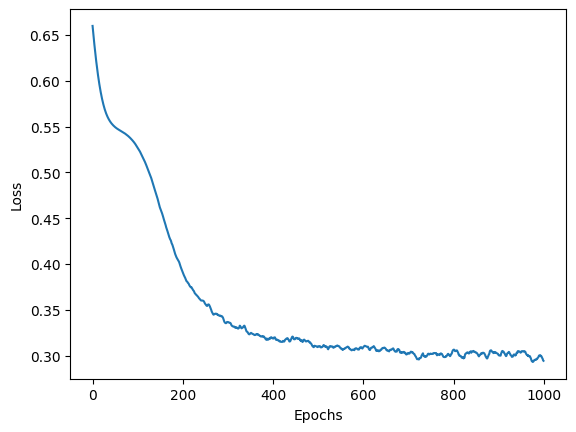

Training Losses are 
          0
0  0.648314
1  0.642359
2  0.636603
3  0.631046
4  0.625684
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2795  249]
 [ 273  683]]
Accuracy: 0.8695, Precision: 0.7328, Recall: 0.7144, F1-score: 0.7235

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2803  241]
 [ 279  677]]
Accuracy: 0.8700, Precision: 0.7375, Recall: 0.7082, F1-score: 0.7225



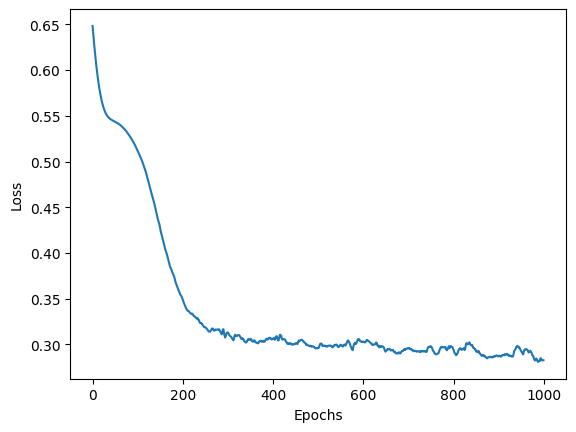

Training Losses are 
          0
0  0.814319
1  0.796401
2  0.779184
3  0.762675
4  0.746889
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2813  231]
 [ 288  668]]
Accuracy: 0.8702, Precision: 0.7430, Recall: 0.6987, F1-score: 0.7202

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2812  232]
 [ 297  659]]
Accuracy: 0.8678, Precision: 0.7396, Recall: 0.6893, F1-score: 0.7136



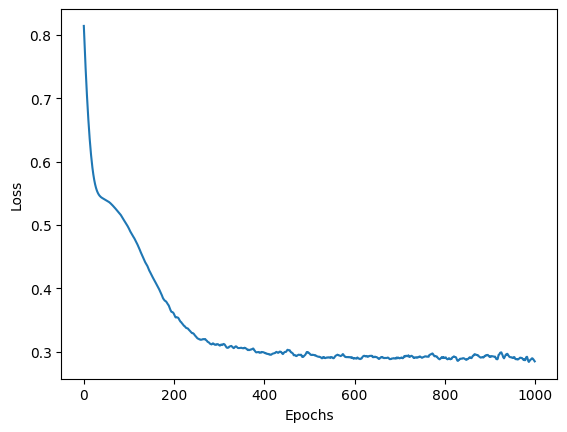

Training Losses are 
          0
0  0.810700
1  0.786844
2  0.764289
3  0.743026
4  0.723036
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2797  247]
 [ 308  648]]
Accuracy: 0.8612, Precision: 0.7240, Recall: 0.6778, F1-score: 0.7002

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2792  252]
 [ 288  668]]
Accuracy: 0.8650, Precision: 0.7261, Recall: 0.6987, F1-score: 0.7122



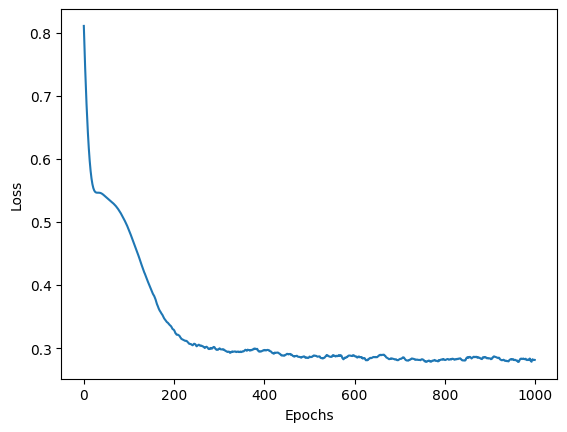

In [25]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(33,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()